In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train , y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test , y_test = test['features'], test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
X_validation.shape

(4410, 32, 32, 3)

In [7]:
y_validation.shape

(4410,)

In [8]:
X_test.shape

(12630, 32, 32, 3)

In [9]:
y_test.shape

(12630,)

41

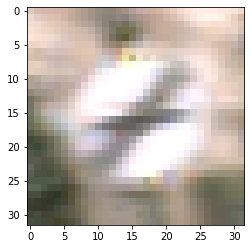

In [10]:
i = 37
plt.imshow(X_train[i])
y_train[i]

7

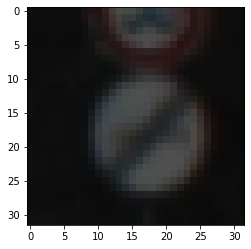

In [11]:
i = 3000
plt.imshow(X_validation[1])
y_validation[i]

11

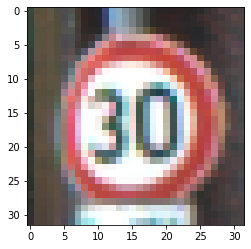

In [12]:
i = 3000
plt.imshow(X_test[1])
y_test[i]

In [13]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train,y_train)

In [14]:
X_train_gray = np.sum(X_train/3,axis=3,keepdims=True)

In [15]:
X_train_gray.shape

(34799, 32, 32, 1)

In [16]:
X_test_gray = np.sum(X_test/3,axis=3,keepdims=True)
X_validation_gray = np.sum(X_validation/3,axis=3,keepdims=True)

In [17]:
X_test_gray.shape

(12630, 32, 32, 1)

In [18]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [19]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [20]:
 X_train_gray_norm

array([[[[ 0.01822917],
         [ 0.0234375 ],
         [ 0.03125   ],
         ...,
         [-0.8671875 ],
         [-0.86979167],
         [-0.8828125 ]],

        [[ 0.015625  ],
         [ 0.0234375 ],
         [ 0.02083333],
         ...,
         [-0.86458333],
         [-0.85677083],
         [-0.86197917]],

        [[ 0.00520833],
         [ 0.01041667],
         [ 0.01302083],
         ...,
         [-0.8828125 ],
         [-0.86197917],
         [-0.86197917]],

        ...,

        [[-0.0625    ],
         [-0.07291667],
         [-0.04947917],
         ...,
         [-0.71614583],
         [-0.84375   ],
         [-0.7265625 ]],

        [[-0.0625    ],
         [-0.0859375 ],
         [-0.07552083],
         ...,
         [-0.84635417],
         [-0.86979167],
         [-0.80208333]],

        [[-0.08854167],
         [-0.109375  ],
         [-0.08854167],
         ...,
         [-0.88541667],
         [-0.890625  ],
         [-0.88541667]]],


       [[[ 0.7890625 ],


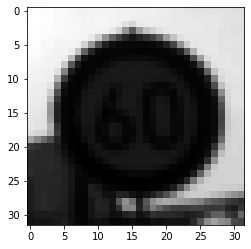

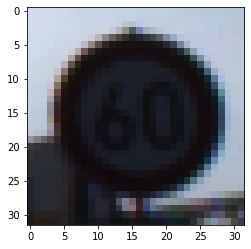

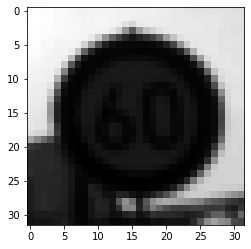

In [21]:
i = 610
plt.imshow(X_train_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(),cmap='gray')

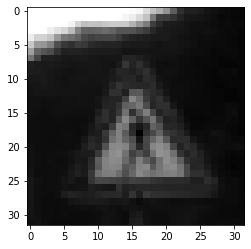

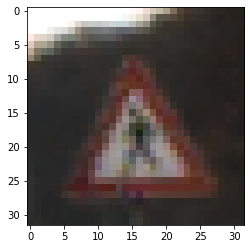

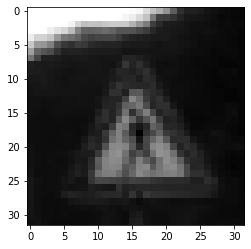

In [22]:
i = 610
plt.imshow(X_test_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(),cmap='gray')

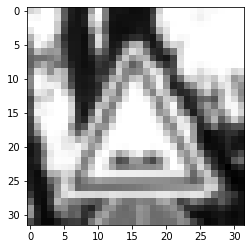

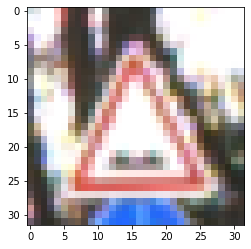

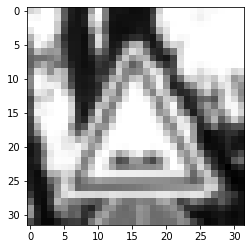

In [23]:
i = 610
plt.imshow(X_validation_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(),cmap='gray')

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [25]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=6,kernel_size=(5,5),activation = 'relu',input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16,kernel_size=(5,5),activation = 'relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120,activation='relu'))

cnn_model.add(Dense(units=43, activation='softmax'))

In [26]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [29]:
history = cnn_model.fit(X_train_gray_norm,
             y_train,
             batch_size=500,
             epochs=50,
             verbose=1,
             validation_data=(X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 2s 36ms/step - loss: 0.5283 - accuracy: 0.8583 - val_loss: 0.9344 - val_accuracy: 0.7478
Epoch 2/50
70/70 [==============================] - 2s 35ms/step - loss: 0.4517 - accuracy: 0.8807 - val_loss: 0.8496 - val_accuracy: 0.7689
Epoch 3/50
70/70 [==============================] - 2s 35ms/step - loss: 0.3936 - accuracy: 0.8965 - val_loss: 0.8329 - val_accuracy: 0.7737
Epoch 4/50
70/70 [==============================] - 2s 35ms/step - loss: 0.3594 - accuracy: 0.9056 - val_loss: 0.8213 - val_accuracy: 0.7810
Epoch 5/50
70/70 [==============================] - 2s 35ms/step - loss: 0.3155 - accuracy: 0.9179 - val_loss: 0.7790 - val_accuracy: 0.7857
Epoch 6/50
70/70 [==============================] - 2s 36ms/step - loss: 0.2821 - accuracy: 0.9271 - val_loss: 0.7520 - val_accuracy: 0.7964
Epoch 7/50
70/70 [==============================] - 3s 37ms/step - loss: 0.2635 - accuracy: 0.9315 - val_loss: 0.7547 - val_accuracy: 0.8007
Epoch 8/50
70

In [28]:
#train model to 50 epochs

In [30]:
score = cnn_model.evaluate(X_test_gray_norm,y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 1.6407 - accuracy: 0.8342
Test Accuracy: 0.8342042565345764


In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

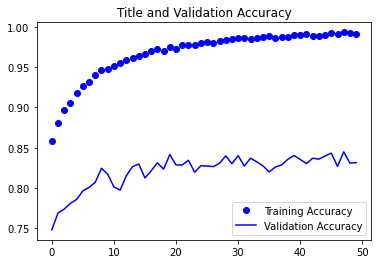

In [36]:
epochs = range(len(accuracy))

plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation Accuracy')
plt.title('Title and Validation Accuracy')
plt.legend()

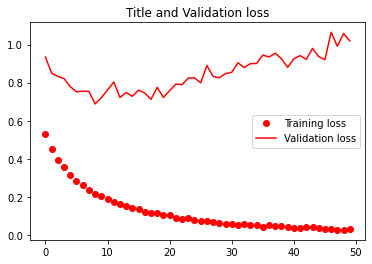

In [38]:
plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Title and Validation loss')
plt.legend()

In [40]:
predict_x = cnn_model.predict(X_test_gray_norm)
predict_classes = np.argmax(predict_x,axis=1)
y_true = y_test

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,predict_classes)

<AxesSubplot:>

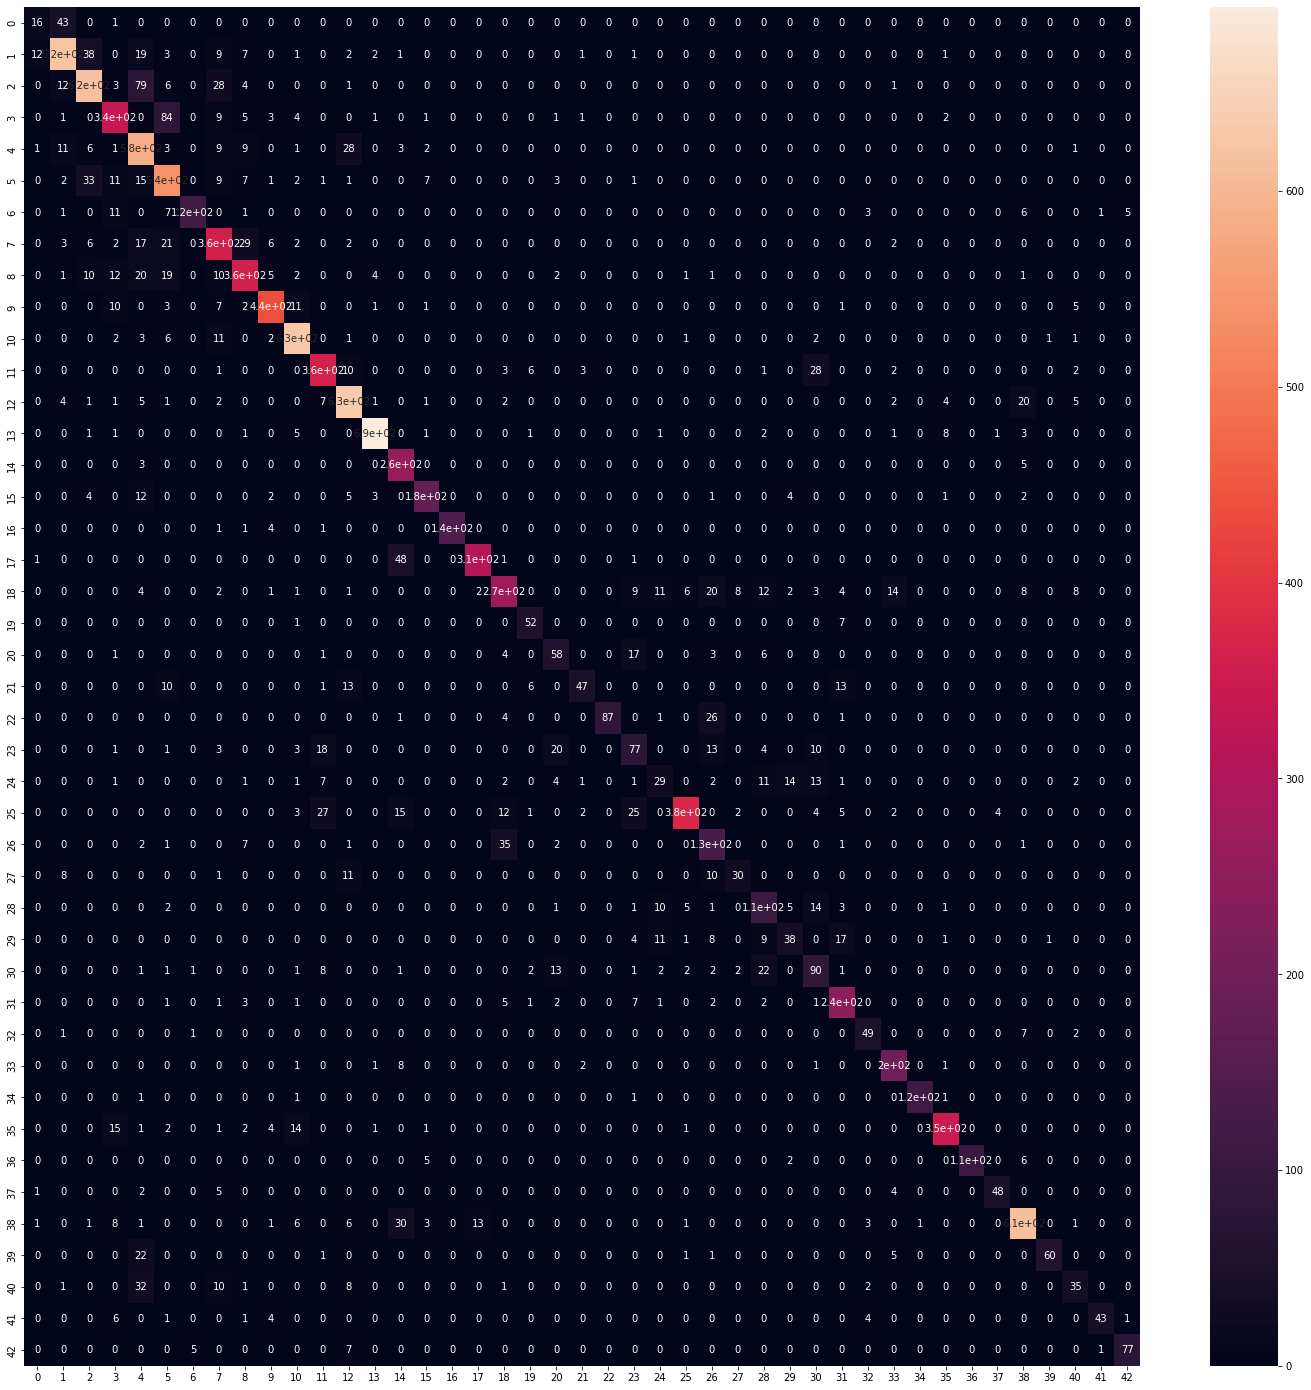

In [43]:
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True)

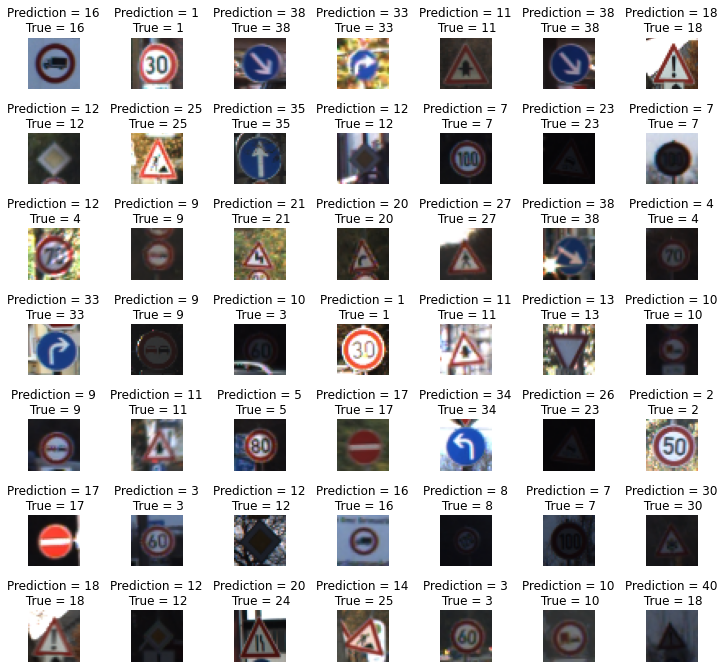

In [47]:
L = 7
W = 7

fig,axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predict_classes[i],y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)    